# Atividade Extra - Normalidade e Reg. Linear dados Municipais - Enem 2019 


Aluno: Matheus Zalamena e Souza  
RGM: 12948128


Inicializando o Drive e fazendo os imports necessários:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings


Mounted at /content/drive


Inicializando o Dataset com os dados do Enem em São Paulo de 2019 que será utilizado na análise:

In [ ]:
%matplotlib inline

df_enemsp = pd.read_csv('/content/drive/MyDrive/Trab normalidade DS/Cópia de enem_2019_tratado_hipoteses.csv', sep=',', encoding='iso-8859-1')

In [ ]:
df_enemsp.head(5)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Definindo o município que vai ser escolhido:


In [ ]:
df_municipio = df_enemsp.loc[df_enemsp.NO_MUNICIPIO_RESIDENCIA == "Santa Isabel"]
df_municipio

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1191,"1,90E+11",Santa Isabel,17,F,1,parda,1,2,pública,35006555.0,...,439.9,Espanhol,1.0,100.0,80.0,80.0,100.0,20.0,380.0,Sim
1982,"1,90E+11",Santa Isabel,18,F,1,amarela,1,1,não_respondeu,NaN,...,692.8,Inglês,1.0,140.0,200.0,160.0,200.0,200.0,900.0,Sim
2890,"1,90E+11",Santa Isabel,58,F,3,parda,1,1,não_respondeu,NaN,...,552.9,Inglês,1.0,120.0,120.0,120.0,120.0,120.0,600.0,Sim
3602,"1,90E+11",Santa Isabel,35,M,2,branca,1,1,não_respondeu,NaN,...,433.4,Inglês,1.0,120.0,60.0,60.0,80.0,0.0,320.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497725,"1,90E+11",Santa Isabel,36,F,2,branca,1,1,não_respondeu,NaN,...,424.8,Espanhol,1.0,100.0,80.0,60.0,80.0,80.0,400.0,Não
498398,"1,90E+11",Santa Isabel,17,F,1,branca,1,2,pública,35006555.0,...,514.4,Inglês,1.0,160.0,120.0,140.0,140.0,160.0,720.0,Sim
498609,"1,90E+11",Santa Isabel,21,M,1,branca,1,1,não_respondeu,NaN,...,561.3,Inglês,1.0,120.0,120.0,120.0,120.0,140.0,620.0,Sim
499505,"1,90E+11",Santa Isabel,18,F,1,preta,1,1,não_respondeu,NaN,...,436.4,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim


Criando a nova coluna de notas para visualização

In [ ]:
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [ ]:
df_municipio['nota_final'] = (df_municipio[nota_final].mean(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Criando um dataframe novo só com as colunas de notas

In [ ]:
notas_municipio = df_municipio[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH','NOTA_REDACAO','nota_final']]
notas_municipio

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
0,564.6,600.2,592.9,585.8,940.0,656.70
1191,443.5,439.9,488.8,395.8,380.0,429.60
1982,594.8,692.8,585.1,621.7,900.0,678.88
2890,566.7,552.9,617.5,634.5,600.0,594.32
3602,463.3,433.4,33.9,407.5,320.0,331.62
...,...,...,...,...,...,...
497725,358.7,424.8,523.2,510.3,400.0,443.40
498398,499.5,514.4,518.1,453.6,720.0,541.12
498609,579.1,561.3,588.7,557.6,620.0,581.34
499505,436.2,436.4,610.2,540.5,560.0,516.66


### Análise da Normalidade e regressão linear


In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats

Teste de Shapiro Wilk pois tem menos de 5000 entradas no dataframe


In [ ]:
stats.shapiro(notas_municipio.nota_final)

ShapiroResult(statistic=0.9951310157775879, pvalue=0.014266863465309143)

Com um p menor que 0,05, tem se que a distribuição pelas notas finais não é uma distribuição normal.

In [ ]:
stats.shapiro(notas_municipio.NOTA_REDACAO)

ShapiroResult(statistic=0.9734324216842651, pvalue=1.0889748824904899e-10)

Com um p maior que 0,05, tem se que a distribuição pelas notas de redação é uma distribuição normal.

Fazendo as mesmas conclusões utilizando um gráfico QQPlot

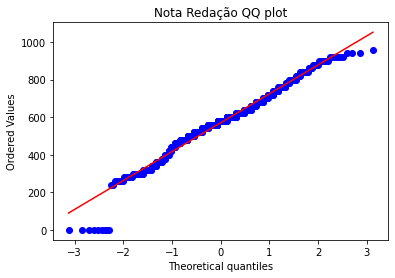

In [ ]:
stats.probplot(notas_municipio['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Nota Redação QQ plot")
plt.show()

Regressão Linear:


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = notas_municipio).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     574.2
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           2.03e-95
Time:                        18:32:19   Log-Likelihood:                -4376.4
No. Observations:                 778   AIC:                             8757.
Df Residuals:                     776   BIC:                             8766.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      273.0742      9.168     29.784   

In [ ]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

              Coeficientes
Intercept       273.074198
NOTA_REDACAO      0.371290


Fórmula notas:

Nota Final = 273.074198 + 0.371290.Nota Redação

In [ ]:
regressao.predict()

Plotando a reta da regressão linear

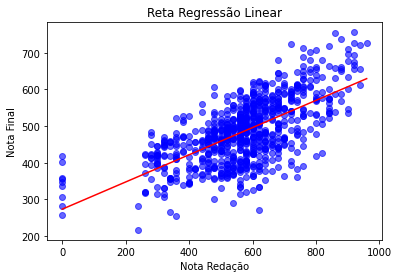

In [ ]:
plt.scatter(y=notas_municipio.nota_final, x=notas_municipio.NOTA_REDACAO, color='blue', alpha=0.6)
X_plot = np.linspace(min(notas_municipio.NOTA_REDACAO), max(notas_municipio.NOTA_REDACAO), len(notas_municipio.NOTA_REDACAO))
# X_plot = np.linspace(0, 1000)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta Regressão Linear')
plt.ylabel('Nota Final')
plt.xlabel('Nota Redação')
plt.show()

Normalidade de Resíduos

In [ ]:
residuos = regressao.resid
residuos

0         34.612787
1191      15.435434
1982      71.644405
2890      98.471537
3602     -60.267139
            ...    
497725    21.809626
498398     0.716684
498609    78.065728
499505    35.663155
499616   -64.553610
Length: 778, dtype: float64

Testes de normalidade para os resíduos de Nota de Redação

In [ ]:
stats.shapiro(residuos)

ShapiroResult(statistic=0.9904693961143494, pvalue=6.257394124986604e-05)

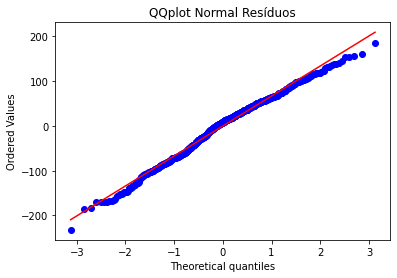

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQplot Normal Resíduos")
plt.show()